In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_excel('/content/Sample - Superstore.xlsx')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Customer ID,Ship Mode,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,CG-12520,Second Class,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,CG-12520,Second Class,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,DV-13045,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,SO-20335,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,SO-20335,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.shape

(9994, 21)

In [5]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Customer ID',
       'Ship Mode', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
data.info()
#find missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Customer ID    9994 non-null   object        
 5   Ship Mode      9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9983 non-null   float64       
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [7]:
data.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2017-04-30 05:17:08.056834048,2017-05-04 04:17:20.304182528,55245.233297,229.858001,3.789574,0.156203,28.656896
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2016-05-23 00:00:00,2016-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2017-06-26 00:00:00,2017-06-29 00:00:00,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2018-05-14 00:00:00,2018-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32038.715955,623.245101,2.225110,0.206452,234.260108


In [9]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

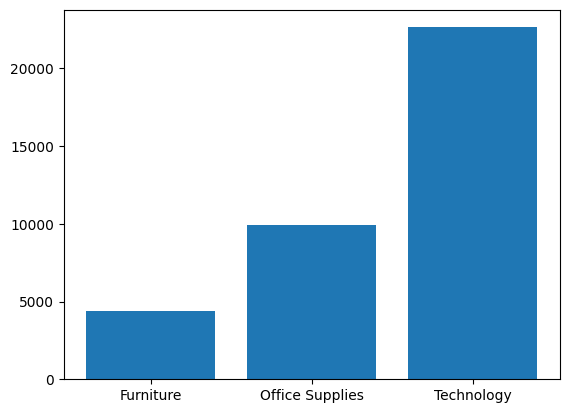

In [10]:
plt.bar(data['Category'],data['Sales'])
plt.show()

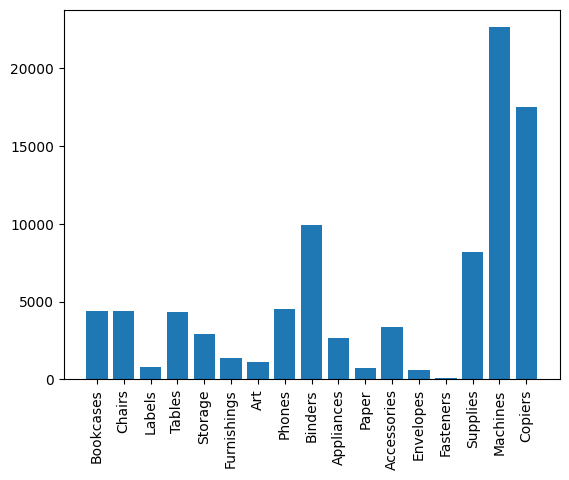

In [14]:
plt.bar(data['Sub-Category'],data['Sales'])
plt.xticks(rotation=90)
plt.show()

In [15]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

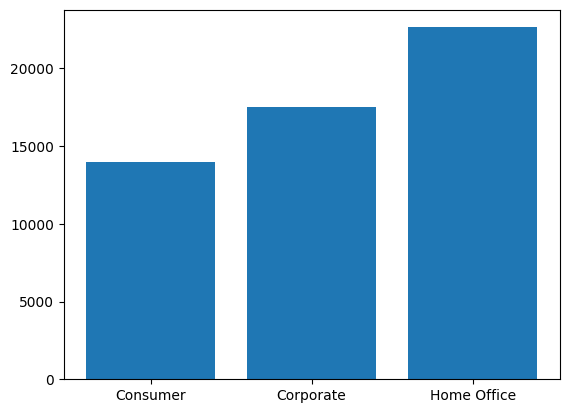

In [16]:
plt.bar(data['Segment'],data['Sales'])
plt.show()

In [18]:
# create new df with loss of data---condition is profit<0
loss_df=data[data['Profit']<0]
loss_df.shape

(1871, 21)

we can see that out of 9994 transaction 1871 incur loss

In [19]:
loss_df.head()

,Row ID,Order ID,Order Date,Ship Date,Customer ID,Ship Mode,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3,4,US-2016-108966,2016-10-11,2016-10-18,SO-20335,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
14,15,US-2016-118983,2016-11-22,2016-11-26,HP-14815,Standard Class,Harold Pawlan,Home Office,United States,Fort Worth,...,76106.0,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
15,16,US-2016-118983,2016-11-22,2016-11-26,HP-14815,Standard Class,Harold Pawlan,Home Office,United States,Fort Worth,...,76106.0,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160
23,24,US-2018-156909,2018-07-16,2018-07-18,SF-20065,Second Class,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140.0,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
27,28,US-2016-150630,2016-09-17,2016-09-21,TB-21520,Standard Class,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140.0,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522


In [22]:
Total_loss=loss_df['Profit'].sum()
print(f'Total loss is {Total_loss}')

Total loss is -156131.2857


In [23]:
loss_df.groupby('Category')['Profit'].sum()


,Profit
Category,
Furniture,-60936.1090
Office Supplies,-56615.2585
Technology,-38579.9182


In [27]:
loss_df.groupby(by='Category').sum(numeric_only=True)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,,
Furniture,3715725,42626448.0,257885.5868,2652,262.14,-60936.1090
Office Supplies,4467221,48505006.0,91608.6750,3425,547.20,-56615.2585
Technology,1403994,13627937.0,119212.8930,963,90.40,-38579.9182


In [24]:
loss_df.groupby('Sub-Category')['Profit'].sum()

,Profit
Sub-Category,
Accessories,-930.6265
Appliances,-8629.6412
Binders,-38510.4964
Bookcases,-12152.2060
Chairs,-9880.8413
Fasteners,-33.1952
Furnishings,-6490.9134
Machines,-30118.6682
Phones,-7530.6235


In [30]:
loss_df.groupby(by='Sub-Category').sum(numeric_only=True)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Sub-Category,,,,,,
Accessories,499173,5286382.0,10958.8000,330,18.20,-930.6265
Appliances,355294,4825871.0,3382.5340,235,53.60,-8629.6412
Binders,3081543,32609300.0,36140.6130,2456,452.40,-38510.4964
Bookcases,577022,6423506.0,48072.7408,422,37.99,-12152.2060
Chairs,1235400,15008025.0,91988.4560,876,61.40,-9880.8413
Fasteners,61455,701930.0,149.2800,55,2.40,-33.1952
Furnishings,906096,10970913.0,12845.8440,597,88.60,-6490.9134
Machines,209526,2236261.0,72456.2530,157,25.60,-30118.6682
Phones,695295,6105294.0,35797.8400,476,46.60,-7530.6235


In [32]:
loss_df.groupby(by='City').sum(numeric_only=True).sort_values('Profit',ascending=True).head(10)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
City,,,,,,
Philadelphia,1209769,4783713.0,70460.5510,892,115.30,-19590.7411
Houston,985125,14256474.0,37640.7304,683,104.14,-14785.3668
Chicago,769944,9397492.0,19910.0120,541,88.20,-11120.6271
San Antonio,172970,2580831.0,17395.1450,139,17.10,-7831.0254
Lancaster,125296,683904.0,7699.2420,71,9.40,-7632.4946
Burlington,17091,108868.0,12044.8740,19,2.00,-5999.3318
Dallas,402084,5412574.0,9981.0642,279,39.10,-4207.7098
Jacksonville,193591,1237176.0,31146.2710,154,18.85,-4059.9857
New York City,199903,400828.0,19533.8020,132,12.20,-3966.0226


In [35]:
data['City'].value_counts()

,count
City,
New York City,912
Los Angeles,747
Philadelphia,536
San Francisco,510
Seattle,428
...,...
Glenview,1
Missouri City,1
Rochester Hills,1
